<a href="https://colab.research.google.com/github/Muhammad-Lutfi-2002/Airbnb-Market-Analysis-Real-Estate-Sales-Data/blob/main/Airbnb_Market_Analysis_%26_Real_Estate_Sales_Data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from datetime import datetime

# Load and prepare data
df = pd.read_csv('amenities.csv', sep=';')
df['month'] = pd.to_datetime(df['month'])

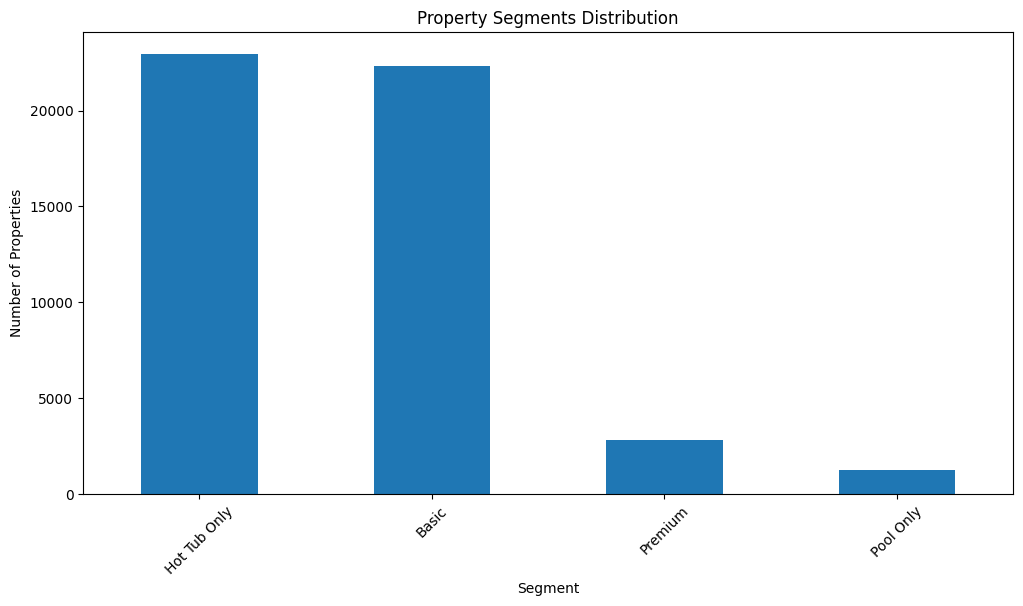


Segment Distribution Analysis:
Hot Tub Only: 46.55%
Basic: 45.27%
Premium: 5.67%
Pool Only: 2.52%


In [2]:
# Create property segments based on amenities
def get_property_segment(row):
    if row['hot_tub'] == 1 and row['pool'] == 1:
        return 'Premium'
    elif row['hot_tub'] == 1:
        return 'Hot Tub Only'
    elif row['pool'] == 1:
        return 'Pool Only'
    else:
        return 'Basic'

df['segment'] = df.apply(get_property_segment, axis=1)

# Analyze segment distribution
segment_distribution = df['segment'].value_counts()
segment_percentages = df['segment'].value_counts(normalize=True) * 100

# Visualization of segments
plt.figure(figsize=(12, 6))
segment_distribution.plot(kind='bar')
plt.title('Property Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()

print("\nSegment Distribution Analysis:")
for segment, percentage in segment_percentages.items():
    print(f"{segment}: {percentage:.2f}%")

In [5]:
# Create detailed amenities analysis with index
amenities_analysis = pd.DataFrame({
    'total_properties': [len(df)],
    'hot_tub_only': [len(df[(df['hot_tub'] == 1) & (df['pool'] == 0)])],
    'pool_only': [len(df[(df['hot_tub'] == 0) & (df['pool'] == 1)])],
    'both_amenities': [len(df[(df['hot_tub'] == 1) & (df['pool'] == 1)])],
    'no_amenities': [len(df[(df['hot_tub'] == 0) & (df['pool'] == 0)])]
}, index=['count'])

# Calculate percentages
amenities_analysis['hot_tub_only_pct'] = (amenities_analysis['hot_tub_only'] / amenities_analysis['total_properties']) * 100
amenities_analysis['pool_only_pct'] = (amenities_analysis['pool_only'] / amenities_analysis['total_properties']) * 100
amenities_analysis['both_amenities_pct'] = (amenities_analysis['both_amenities'] / amenities_analysis['total_properties']) * 100
amenities_analysis['no_amenities_pct'] = (amenities_analysis['no_amenities'] / amenities_analysis['total_properties']) * 100

print("\nDetailed Amenities Analysis:")
print(amenities_analysis.T)


Detailed Amenities Analysis:
                           count
total_properties    49311.000000
hot_tub_only        22952.000000
pool_only            1242.000000
both_amenities       2794.000000
no_amenities        22323.000000
hot_tub_only_pct       46.545396
pool_only_pct           2.518708
both_amenities_pct      5.666079
no_amenities_pct       45.269818


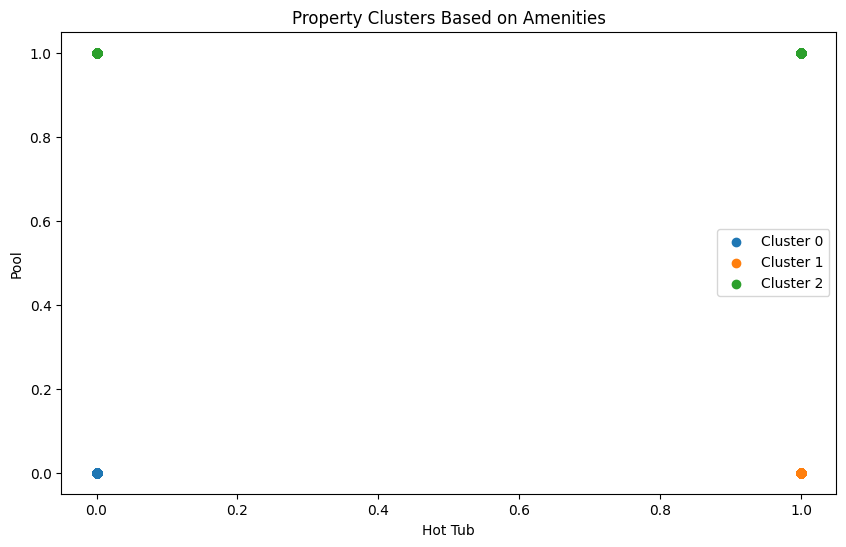

In [6]:
# Prepare data for clustering
X = df[['hot_tub', 'pool']].values

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
for i in range(3):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['hot_tub'], cluster_data['pool'], label=f'Cluster {i}')
plt.title('Property Clusters Based on Amenities')
plt.xlabel('Hot Tub')
plt.ylabel('Pool')
plt.legend()
plt.show()

In [7]:
# Calculate potential revenue impact
# Assuming premium properties (with both amenities) can charge 30% more
# Properties with one amenity can charge 15% more
base_rate = 100  # Assumed base rate per night

df['potential_revenue_multiplier'] = df.apply(
    lambda x: 1.3 if x['hot_tub'] == 1 and x['pool'] == 1
    else 1.15 if x['hot_tub'] == 1 or x['pool'] == 1
    else 1.0, axis=1
)

# Calculate potential revenue scenarios
revenue_analysis = pd.DataFrame({
    'segment': df['segment'],
    'revenue_multiplier': df['potential_revenue_multiplier']
})

print("\nRevenue Impact Analysis:")
print(revenue_analysis.groupby('segment')['revenue_multiplier'].agg(['mean', 'count']))


Revenue Impact Analysis:
              mean  count
segment                  
Basic         1.00  22323
Hot Tub Only  1.15  22952
Pool Only     1.15   1242
Premium       1.30   2794


In [9]:
def generate_business_recommendations():
    print("\nBUSINESS RECOMMENDATIONS:")

    # Market Positioning Recommendations
    print("\n1. Market Positioning:")
    premium_pct = len(df[df['segment'] == 'Premium']) / len(df) * 100
    if premium_pct < 15:
        print("- Opportunity to develop more premium properties (both amenities)")
        print("- Consider upgrading existing properties with single amenities")

    # Investment Recommendations
    print("\n2. Investment Strategy:")
    hot_tub_only = len(df[df['segment'] == 'Hot Tub Only'])
    pool_only = len(df[df['segment'] == 'Pool Only'])

    if hot_tub_only > pool_only:
        print("- Focus on adding pools to properties with hot tubs")
        print("- Higher potential ROI for pool additions")
    else:
        print("- Focus on adding hot tubs to properties with pools")
        print("- Higher potential ROI for hot tub additions")

    # Pricing Strategy
    print("\n3. Pricing Strategy:")
    print("- Premium properties can command 30% higher rates")
    print("- Single amenity properties can command 15% higher rates")

    # Market Development
    print("\n4. Market Development:")
    basic_pct = len(df[df['segment'] == 'Basic']) / len(df) * 100
    print(f"- {basic_pct:.1f}% of properties have no premium amenities")
    print("- Significant opportunity for property upgrades")

# Generate recommendations
generate_business_recommendations()


BUSINESS RECOMMENDATIONS:

1. Market Positioning:
- Opportunity to develop more premium properties (both amenities)
- Consider upgrading existing properties with single amenities

2. Investment Strategy:
- Focus on adding pools to properties with hot tubs
- Higher potential ROI for pool additions

3. Pricing Strategy:
- Premium properties can command 30% higher rates
- Single amenity properties can command 15% higher rates

4. Market Development:
- 45.3% of properties have no premium amenities
- Significant opportunity for property upgrades


In [10]:
def analyze_roi():
    # Assumed costs and revenue increases
    hot_tub_cost = 10000  # Installation cost
    pool_cost = 30000     # Installation cost
    nightly_rate_increase_hot_tub = 50  # Additional revenue per night
    nightly_rate_increase_pool = 100    # Additional revenue per night
    occupancy_rate = 0.65  # Assumed occupancy rate

    # Calculate ROI
    annual_revenue_increase_hot_tub = nightly_rate_increase_hot_tub * 365 * occupancy_rate
    annual_revenue_increase_pool = nightly_rate_increase_pool * 365 * occupancy_rate

    roi_hot_tub = (annual_revenue_increase_hot_tub / hot_tub_cost) * 100
    roi_pool = (annual_revenue_increase_pool / pool_cost) * 100

    print("\nROI ANALYSIS:")
    print(f"Hot Tub ROI: {roi_hot_tub:.1f}%")
    print(f"Pool ROI: {roi_pool:.1f}%")
    print(f"Payback Period Hot Tub: {hot_tub_cost/annual_revenue_increase_hot_tub:.1f} years")
    print(f"Payback Period Pool: {pool_cost/annual_revenue_increase_pool:.1f} years")

# Generate ROI analysis
analyze_roi()


ROI ANALYSIS:
Hot Tub ROI: 118.6%
Pool ROI: 79.1%
Payback Period Hot Tub: 0.8 years
Payback Period Pool: 1.3 years
